## **P03: Connect 4 Agent (Minimax, Alpha-Beta Pruning)**
*Tijuana, B.C. | 26 MAR 2024*

*Presenta:*
- Agraz Vallejo Daniel
- Cruz Jimenez Axel
- Roldan Machado David

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from classes.players.HumanPlayer import HumanPlayer
from classes.players.SmartComputerPlayer import SmartComputerPlayer

In [156]:
# Board Graphic display settings (Connect 4)
SYMBOL_SIZE = 30
X_SYMBOL = 'X'; X_COLOR = 'b'
O_SYMBOL = 'O'; O_COLOR = 'r'
X_POS = {0: 0.25, 1: 1.21, 2: 2.25, 3:3.21, 4:4.25, 5:5.21, 6:6.25}
Y_POS = {0: 5.25, 1: 4.25, 2: 3.25, 3:2.25, 4:1.25, 5:0.25}
GAME_DIMS = (6,7)

class Board():
    __graph_board : Figure   # Visual representation 
    __s : np.ndarray         # Board state
    __bin: np.ndarray        # Array that contains 0s and 1s count from s
    __history: list          # Stores played moves
    __ply: int               # Number of moves
    __dim: tuple             # Board dimensions


    def __init__(self, dim:tuple) -> Figure:
        self.__s = np.empty(dim, dtype=object)
        self.__graph_board = None
        self.__history = []
        self.__ply = 0
        self.__dim = dim
        self.set_bin()
        self.__init_board()
 
    # BOARD METHODS
    # Board Initialization
    def __init_board(self):
        """
        A helper function to plot Tic-Tac-Toe Board
        """
        plt.ioff()

        # Create a new figure
        self.__graph_board, ax = plt.subplots()
        self.__graph_board.set_facecolor('k')


        # Draw Board
        delta = abs(self.__dim[0] - self.__dim[1])
        for i in range(0, self.__dim[1] - delta):
            ax.plot([0, self.__dim[1]], [i, i], 'w-')

        for j in range(0, self.__dim[0] + delta + 1):
            ax.plot([j, j], [0, self.__dim[0]], 'w-')

        # Set the aspect of the plot to be equal to get a square grid
        ax.set_aspect('equal')

        # Remove axes
        ax.axis('off')
    
    # Resets board
    def init_state(self):
        plt.close('all')
        self.__init__(self.__dim)


    # Visually display current game board
    def update_board(self, u:np.ndarray) -> Figure:
        ax = self.__graph_board.axes[0]
        x, y = u[0], u[1]
        if self.__s[x, y] is not None:
            symbol = X_SYMBOL if self.__s[x, y] == 1 else O_SYMBOL
            color = X_COLOR if symbol == X_SYMBOL else O_COLOR
            ax.text(X_POS[y], Y_POS[x], symbol, fontsize=SYMBOL_SIZE, color=color)


    # IMPLEMENTATION METHODS
        
    # Player(s): Gets the player in turn to play from board state
    def player(self) -> str:
        return 'X' if np.sum(self.__s == 1) <= np.sum(self.__s == 0) else 'O'

    # Actions(s): Get player's actions from given state (SPACE SEARCH U(x))
    def actions(self) -> np.ndarray:
        return np.transpose(np.where(self.__s == None))

    # Result(s, a): Executes board move (TRANSITION FUNCTION f(x,u))
    def make_move(self, x:np.ndarray):
        x = x.flatten()
        if self.__s[x[0], x[1]] is None:
            self.__s[x[0], x[1]] = 1 if self.player() == 'X' else 0
            self.__history.append(x)
            self.__ply += 1
            self.set_bin()
        else:
            print("Invalid Move. Square has been taken.")
    
    # Reverts last move
    def undo_move(self):
        if len(self.history) == 0:
            pass
        else:
            self.__s[self.history[-1][0], self.history[-1][1]] = None
            self.__ply -= 1

    # Terminal(s): From current board state, indicates if the board has a winner or draw
    def is_terminal(self) -> bool:
        winner = self.winner()
        if winner == None or winner: 
            return True
        else: return False

    # Winner(s): Given current game state return the game's outcome
    def winner(self):
        self.undo_move()
        prospect_winner = self.player()
        if len(self.history) > 0: self.make_move(self.history[-1]); self.history.pop()
        win_struct = np.ones((1,self.__dim[0])) if prospect_winner == 'X' else np.zeros((1, self.__dim[0]))
        
        # Check winner by Rows & Columns
        for i in range(self.__s.shape[0]):
            if (np.isin(self.__s[i,:], win_struct).all() or np.isin(self.__s[:,i].T, win_struct).all()):
                return prospect_winner
            
        # Check winner by diagonals
        if (np.isin(np.diag(self.__s), win_struct).all() or (np.fliplr(self.__s).diagonal() == win_struct).all()):
            return prospect_winner
        elif np.sum(self.__bin) == np.prod(self.__s.shape): return None
        return False
    
    # Utility(s): Returns board evaluation given a terminal state
    def utility(self):
        if self.is_terminal():
            winner = self.winner()
            if winner == None: return 0
            return 1 if winner == 'X' else -1
        else:
            return False


    # GETTERS
    @property
    def board(self) -> Figure:
        return self.__graph_board
    
    @property
    def state(self) -> np.ndarray:
        return self.__s
            
    @property
    def history(self) -> list:
        return self.__history
    
    @property
    def ply(self) -> int:
        return self.__ply
    
    # SETTERS
    def set_state(self, s:np.ndarray):
        self.__s = s
        self.set_bin()

    def set_bin(self):
        self.__bin = np.bincount(self.__s[(self.__s != None)].astype(np.int8))

#### **P1.1:** Implementar el juego Conecta 4 de forma completa empleando las funciones que se especifican en **P1.3**

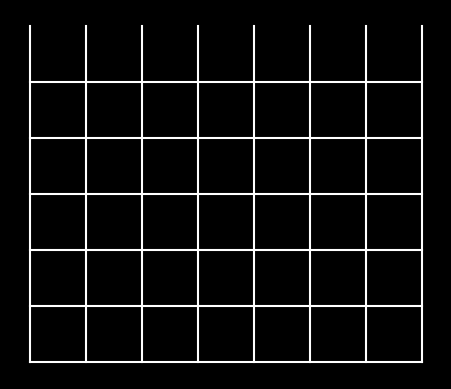

In [5]:
b = Board((6,7))
b.board

In [175]:
b.init_state()

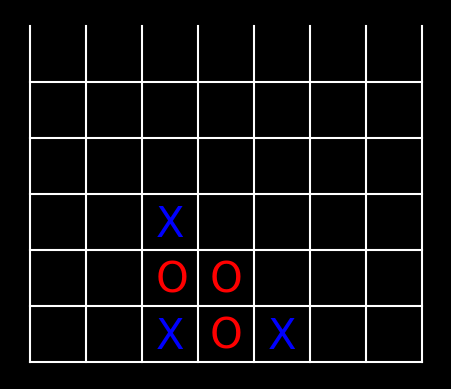

In [176]:
b.make_move(np.array([5,2])); b.update_board(np.array([5,2]))
b.make_move(np.array([5,3])); b.update_board(np.array([5,3]))
b.make_move(np.array([5,4])); b.update_board(np.array([5,4]))
b.make_move(np.array([4,2])); b.update_board(np.array([4,2]))
b.make_move(np.array([3,2])); b.update_board(np.array([3,2]))
b.make_move(np.array([4,3])); b.update_board(np.array([4,3]))
display(b.board)

#### **P1.2:** La dinámica del juego es la siguiente:  

a) El usuario selecciona $\text{'X'}$ u $\text{'O'}$

b) Siempre inicia el juego $\text{'X'}$ (MAX)

c) Llevar a cabo el juego entre agente y usuario.

d) Desplegar el estado de juego a cada paso (movimiento).

e) Desplegar resultado final (ganador o empate).

#### **P1.3:** Implementar las siguientes funciones del agente:

`initial_state()`: el estado inicial, $S_{0}$, especifica la configuración  
inicial del juego (en nuestro caso, un tablero vacío de $6 \times 7$).

`display(s)`: función para desplegar la inforamción del tablero  
(estado actual) en forma gráfica utilizando: Matplotlib, Pygame, Tkinter, OpenCV.

`player(s)`: regresa a que jugador ($X\;\text{u}\;O$) le toca mover dado el estado `s`.

`actions(s)`: regresa un conjunto de acciones legales (qué lugares   
están libres en el tablero) dado el estado `s`.

`result(s,a)`: el modelo de transición, función que regresa  
el estado reusltante de tomar la acción `a` en el estado `s`.

`terminal(s)`: la prueba de terminación es verdadera (`True`) cuando el  
juego termina (es decir, verificar si alguien ganó o hay empate) y es   
falsa (`False`) en caso contrario. El estado `s` donde termina el juego   
es llamado estado terminal.

`utility(s)`: la función de utilidad (también llamada función objetivo)  
define el valor numérico final para el jugador cuando el juego terminal  
en el estado terminal `s`. Devuelve el valor de utilidad del estado: -1, 0 o 1.

`minimax(s)`: Optimizado con `alpha-beta pruning`, función que regresa  
el valor (movimiento)óptimo dependiendo a que jugador $(X \;\text{u} \; O)$   
le toca mover el estado.  